In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import pandas as pd

In [2]:
#CHECK IF THE METADATA FILES USED HAS THOSE COLUMNS,IF NOT,COMMENT THE CODE

metadata_train_df = pd.read_csv('Training_metadata_30000.csv')

metadata_train_df['benign_malignant'].fillna('benign', inplace=True)
metadata_train_df['family_hx_mm'].fillna(False, inplace=True)
metadata_train_df['personal_hx_mm'].fillna(False, inplace=True)
metadata_train_df['age_approx'].fillna(45, inplace=True)

metadata_train_df['benign_malignant'] = metadata_train_df['benign_malignant'].map({'benign': 0, 'malignant': 1})
metadata_train_df['family_hx_mm'] = metadata_train_df['family_hx_mm'].map({True: 1, False: 0})
metadata_train_df['personal_hx_mm'] = metadata_train_df['personal_hx_mm'].map({True: 1, False: 0})

metadata_train_df['isic_id'] = metadata_train_df['isic_id'].apply(lambda x: f"{x}.JPG")



metadata_train_df = metadata_train_df[['benign_malignant', 'isic_id']]  
metadata_train_df.to_csv('metadata_train_encoded.csv', index=False)

metadata_test_df = pd.read_csv('Testing_metadata_10000.csv')

metadata_test_df['benign_malignant'].fillna('benign', inplace=True)
metadata_test_df['family_hx_mm'].fillna(False, inplace=True)
metadata_test_df['personal_hx_mm'].fillna(False, inplace=True)

metadata_test_df['benign_malignant'] = metadata_test_df['benign_malignant'].map({'benign': 0, 'malignant': 1})
metadata_test_df['family_hx_mm'] = metadata_test_df['family_hx_mm'].map({True: 1, False: 0})
metadata_test_df['personal_hx_mm'] = metadata_test_df['personal_hx_mm'].map({True: 1, False: 0})

metadata_test_df['isic_id'] = metadata_test_df['isic_id'].apply(lambda x: f"{x}.JPG")

metadata_test_df = metadata_test_df[['benign_malignant', 'isic_id']]
metadata_test_df.to_csv('metadata_test_encoded.csv', index=False)

metadata_train_dir = pd.read_csv('metadata_train_encoded.csv')
metadata_test_dir = pd.read_csv('metadata_test_encoded.csv')

train_dir = 'Training_images_30000'  # replace with your actual directory
test_dir = 'Testing_images_10000'  


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    classes=['benign', 'malignant'],
    class_mode='categorical',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    classes=['benign', 'malignant'],
    class_mode='categorical',
    batch_size=32
)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()


In [ ]:

checkpoint = ModelCheckpoint(
    "CUSTOM_MODEL.h5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

early = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=20,
    verbose=1,
    mode='auto'
)

hist = model.fit(
    train_data,
    steps_per_epoch=10,
    validation_data=test_data,
    validation_steps=10,
    epochs=100,
    callbacks=[checkpoint, early]
)


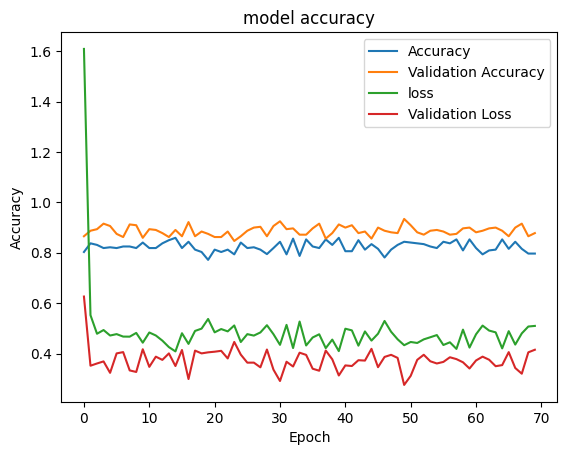

In [6]:

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


model = load_model('YOUR MODEL NAME.h5')

img = image.load_img(r'YOUR IMAGE PATH', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
print(predictions)

benign_prob, malignant_prob = predictions[0]

if benign_prob > malignant_prob:
    print("The model predicts that the image is benign.")
else:
    print("The model predicts that the image is malignant.")
